In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 读取CSV文件
file_path = '/Volumes/T7/Psychopy/data/Exp1_task1_001.csv'
data = pd.read_csv(file_path)

# 数据预处理：去除缺失值
data = data.dropna(subset=['rt', 'correct'])

In [5]:
#—————————————————————# 设置中文字体 #—————————————————————————#
# 设置字体为Arial Unicode MS
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_33358/3253294073.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('stage')


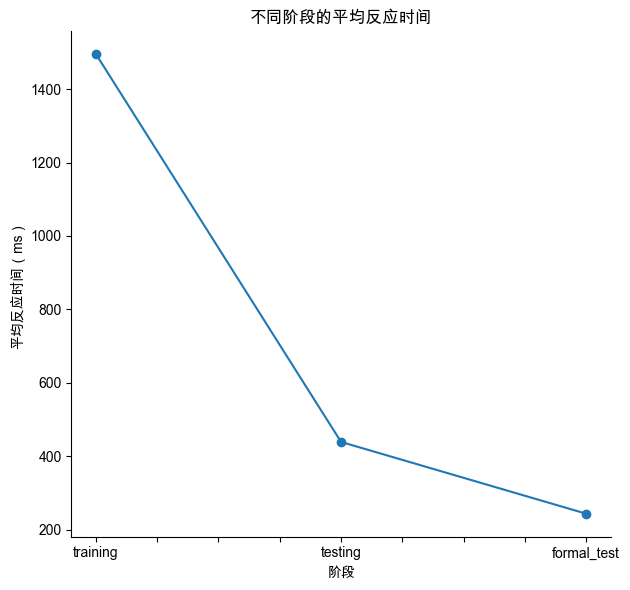

In [14]:
# 将correct列转换为整数类型
data['correct'] = data['correct'].astype(int)

# 设置stage列的分类顺序
stage_order = ['training', 'testing', 'formal_test']
data['stage'] = pd.Categorical(data['stage'], categories=stage_order, ordered=True)

# 根据阶段（stage）分组
grouped = data.groupby('stage')

# 计算每个阶段的平均反应时间和正确率
mean_rt = grouped['rt'].mean()

# 绘制反应时间的变化趋势
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mean_rt.plot(kind='line', marker='o')
plt.title('不同阶段的平均反应时间')
plt.xlabel('阶段')
plt.ylabel('平均反应时间（ms）')

sns.despine()
plt.tight_layout()
plt.show()

/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_33358/1972910960.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correct_counts = data.groupby(['stage', 'correct']).size().unstack().fillna(0)


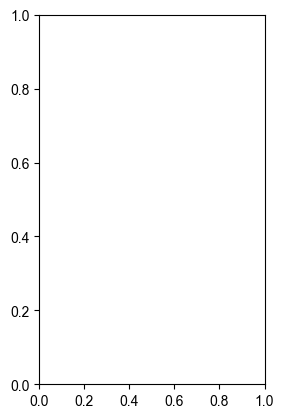

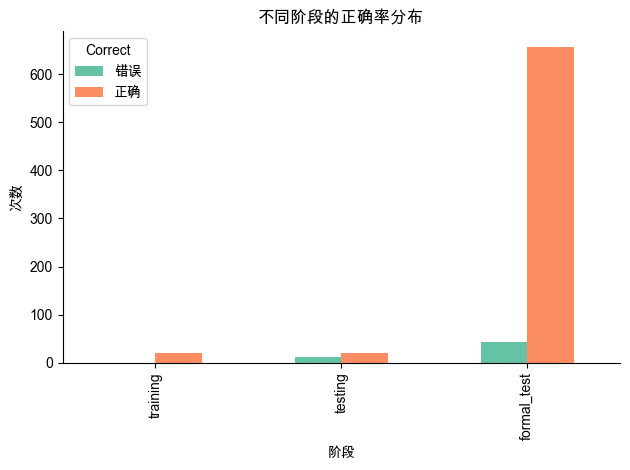

In [ ]:
# 根据阶段（stage）和correct分组，统计每个阶段中0和1的次数
correct_counts = data.groupby(['stage', 'correct']).size().unstack().fillna(0)

# 设置配色方案
sns.set_palette("Set2")

# 绘制正确率的分布情况
plt.subplot(2, 2)
correct_counts.plot(kind='bar', stacked=False)
plt.title('不同阶段的正确率分布')
plt.xlabel('阶段')
plt.ylabel('次数')
plt.legend(title='Correct', labels=['错误', '正确'])

sns.despine()
plt.tight_layout()
plt.show()